# 비지도 학습 소개

# 1.환경준비

## (1) 라이브러리 로딩

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## (2) Data Loading

In [6]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/customer_segmentation.csv'
data = pd.read_csv(path)
data.head()

,CustID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 2.데이터 전처리

## (1) 데이터 분할

In [9]:
# 군집화는 아래 변수들만 사용합니다.
x = data.loc[:, ['Age', 'Income', 'Score']]

In [10]:
x

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## (2) 스케일링

In [12]:
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)

In [13]:
x_s

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

# 3.클러스터링

## (1)  k-means 모델 만들기
* k값을 늘려가면서(2~20) 모델을 만들고, inertia 값 혹은 실루엣 점수를 저장합니다.
* 그래프를 통해서 최적의 k값을 결정합니다.
    * 단, k값은 3~6개 사이에서 결정하세요.
* 선정된 k값으로 모델을 생성합니다.

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # x , y예측 을 값으로 받음 


In [17]:
k_values = range(2,21)

inertias = []
sil_score = []
for k in k_values:
    model = KMeans(n_clusters = k , n_init = 'auto')
    model.fit(x_s)
    inertias.append(model.inertia_) # 군집간 거리 측정
    pred = model.predict(x_s)
    sil_score.append(silhouette_score(x_s,pred)) # 군집간 실루엣 점수


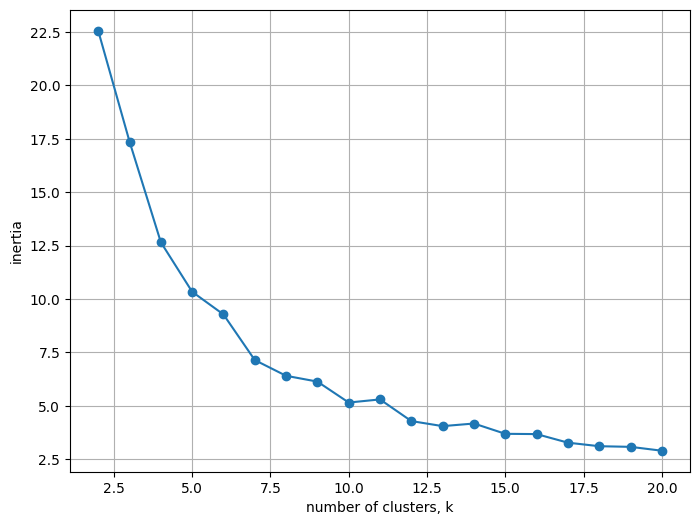

In [18]:
# Plot k vs inertias
plt.figure(figsize = (8, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()


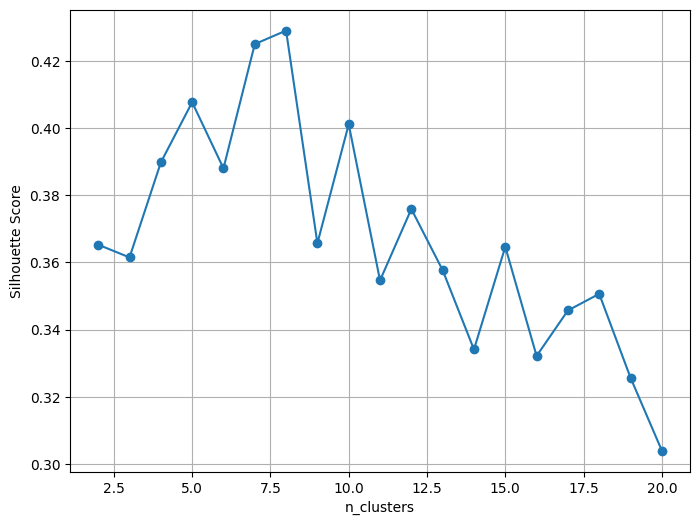

In [19]:
# Plot k vs siluet
plt.figure(figsize = (8, 6))
plt.plot(k_values, sil_score, marker='o')
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [20]:
# 최적의 군집은 k = 7 임을 알 수 있음 

## (2) 데이터 군집 결과 정리
* 데이터를 군집화 하여 기존 데이터와 합치기
    * pd.concat([data, pred], axis = 1)

In [22]:
# 예측
# 모델 생성
model = KMeans(n_clusters= 7, n_init = 'auto')
model.fit(x_s)
pred = model.predict(x_s)

# 예측 결과를 데이터프레임으로 만들고
pred = pd.DataFrame(pred, columns = ['predicted'])

# 원본 데이터와 합치기
x = pd.concat([x,pred], axis = 1)

# 예측 결과는 카테고리 타입으로 변경
x['predicted'] = x['predicted'].astype('category')



,Age,Income,Score,predicted
0,19,15,39,3
1,21,15,81,1
2,20,16,6,5
3,23,16,77,1
4,31,17,40,3
...,...,...,...,...
195,35,120,79,6
196,45,126,28,2
197,32,126,74,6
198,32,137,18,2


In [56]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age        200 non-null    int64   
 1   Income     200 non-null    int64   
 2   Score      200 non-null    int64   
 3   predicted  200 non-null    category
dtypes: category(1), int64(3)
memory usage: 5.3 KB


# 4.후속 분석
* 군집별 특징을 분석해 봅시다.

## (1) 군집별 변수 비교
* 활용 가능한 차트 : sns.barplot, sns.kdeplot, sns.boxplot, mosaic

### 1) Age

### 2) Income

### 3) Score

### 4) Gender
* 모자익 플롯을 사용해 봅시다.

In [29]:
from statsmodels.graphics.mosaicplot import mosaic

## (2) 한꺼번에 비교하기
* sns.pairplot을 이용하여 한꺼번에 비교해 봅시다.

In [31]:
# 'Age', 'Income', 'Score', 'pred'만 추출


## (3) 각 군집별 특징을 정리해 봅시다.
* 각 군집의 특징(다른 군집과 차별화 되는 요소)을 정리합시다.
* 각 군집의 특징으로 볼 때, 어떤 고객군이라고 볼 수 있을까요?
* 각 고객군에 대한 적절한 마케팅 방법은?
* 더 필요한 정보는?